In [11]:
%pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)



In [153]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package wordnet to C:\Users\Tatwamasi
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Tatwamasi
[nltk_data]     Mishra\AppData\Roaming\nltk_data...


There are 245919 words in the combination of all reviews.


In [165]:
# loading the data into dataframe
dataset = pd.read_excel(r'./phonepe_reviews.xlsx')
# dataset[["content"]].head()

# extracting all text from the reviews
text = " ".join(review for review in dataset.content)
print ("There are {} words in the combination of all reviews.".format(len(text)))

# TEXT PREPROCESSING

# tokenization
nltk.download('punkt')
text = nltk.sent_tokenize(text)
# print(text)

# ignoring case and punctuation and unnecessary spaces
for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = re.sub(r'\W', ' ', text[i])
    text[i] = re.sub(r'\s+', ' ', text[i])
#     print(text[i]) 


There are 245919 words in the combination of all reviews.


In [166]:
# stemming & LEMMATIZATION
wnl = WordNetLemmatizer()

for i in range(len(text)):
#     print(text[i])
    text[i] = word_tokenize(text[i])
#     print("printing text " + str(i))
#     print(text[i])
    for j in range(len(text[i])) :
        text[i][j]= wnl.lemmatize(text[i][j], pos="v")
#     print("printing stemmed text " + str(i))
print(text)
        
# removal of stopwords  
stopwords = set(STOPWORDS)
stopwords.update(["app", "payment", "transaction", "phone", "pay", "phonepe", "money"])

[['the', 'app', 'have', 'be', 'disappoint', 'in', 'term', 'of', 'its', 'slowness', 'over', 'last', 'couple', 'of', 'months', 'update'], ['it', 'use', 'to', 'be', 'my', 'favorite', 'once', 'and', 'now', 'it', 'take', 'almost', '2', 'minutes', 'to', 'complete', 'a', 'transaction'], ['open', 'the', 'app', 'scan', 'the', 'qr', 'fetch', 'the', 'merchant', 's', 'information', 'payment', 'each', 'stage', 'take', 'its', 'own', 'sweet', 'time', 'to', 'complete'], ['this', 'become', 'more', 'frustrate', 'when', 'we', 'be', 'pay', 'someone', 'face', 'to', 'face'], ['i', 'have', 'to', 'switch', 'to', 'another', 'upi', 'app', 'eventually'], ['please', 'fix', 'this'], ['i', 'can', 'not', 'open', 'to', 'mobile', 'number', 'section', 'since', 'more', 'three', 'weeks', 'as', 'far', 'as', 'i', 'can', 'remember'], ['i', 'click', 'on', 'it', 'it', 'show', 'a', 'loader', 'and', 'reload', 'the', 'homepage', 'and', 'that', 's', 'it'], ['i', 'don', 't', 'know', 'if', 'this', 'be', 'relate', 'or', 'not', 'but'

In [168]:
keywords = [
    "terrible", "worst", "issue", "slow", "unable", "hate", "unable", "rude", "bad", "wrong", "pain", "pathetic",
    "failure", "suffering", "crash", "poor", "fraudulent", "force", "garbage", "irritate"
    
    "okay", "average"
    
    "excellent", "good", "happy", "pleased", "great", "fast", "best", "awesome", "cool", "smoothly", "easy to use", "useful",
    "satisfied", "fixed", "love", "fantastic", "super"
]

# scoring by frequencies
frequency = {}

for i in range(len(text)) :
    for word in text[i]:
        if word in keywords:
            if word in frequency:
                frequency[word] += 1
            else:
                frequency[word] = 1
print(frequency)

{'love': 21, 'fast': 32, 'worst': 154, 'issue': 270, 'pathetic': 11, 'happy': 11, 'unable': 87, 'wrong': 46, 'good': 156, 'slow': 38, 'great': 22, 'useful': 26, 'best': 48, 'fraudulent': 3, 'super': 10, 'bad': 98, 'force': 11, 'crash': 20, 'hate': 4, 'smoothly': 6, 'poor': 17, 'rude': 3, 'pain': 2, 'terrible': 4, 'failure': 7, 'garbage': 2, 'fantastic': 6, 'awesome': 9, 'cool': 3}


In [169]:
cloud_mask = np.array(Image.open("img/wordcloud.png"))

In [170]:
wc = WordCloud(background_color="white", max_words=1000, mask=cloud_mask,
               stopwords=stopwords, contour_width=1, contour_color='black')

# generating word cloud from frequencies
wc.generate_from_frequencies(frequency)

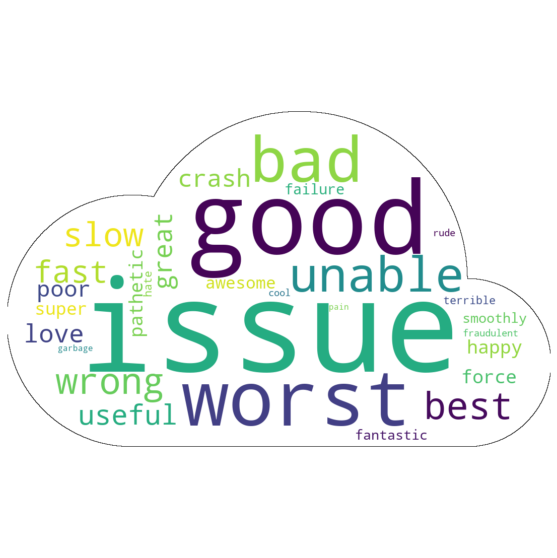

In [171]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()